#### Imports

In [453]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sn

In [454]:
theDirectory = "shapes/"
theCategories = ["Circle", "Square", "Triangle"]

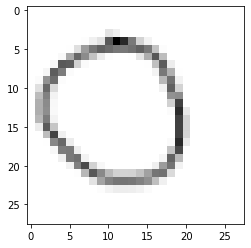

In [455]:
for category in theCategories:
    path = os.path.join(theDirectory, category) #path to Circle, Square or Triangle
    for img in os.listdir(path):
        imgArray = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(imgArray, cmap="gray")
        plt.show()
        break
    break

In [456]:
print(imgArray)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 229 239 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 253 240 227  95   9  49 127 212 244 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 254 224 159 124 103 112 124 125 117 104 127 197 252
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 249 172 108 144 198 236 253 255 255 254 230 177  93 191
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 247  96  99 210 250 255 255 255 255 255 255 255 254 193  98
  237 255 255 255 255 255 255 255 255 255]
 [255 255 246 100 129 251 255 255 255 255 255 255 255 255 255 25

In [457]:
imgArray.shape

(28, 28)

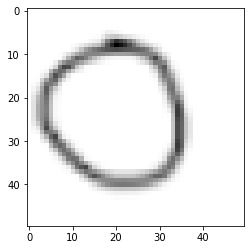

In [458]:
imageSize = 50
newArray = cv2.resize(imgArray, (imageSize, imageSize))
plt.imshow(newArray, cmap='gray')
plt.show()

In [459]:
trainingData = []
def createTrainingData():
    for category in theCategories:
        #The Path to Circle, Square or Triangle
        path = os.path.join(theDirectory, category)
        #As we already know the labels in machine learning algorithims must be numerical. We simply use the indexes of
        #the folders and set them as the labels so 0 for Circle, 1 for Square and 2 for Triangle
        classNum = theCategories.index(category)
        for img in os.listdir(path):
            try:
                imgArray = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #Resize the images
                newArray = cv2.resize(imgArray, (imageSize, imageSize))
                trainingData.append([newArray, classNum])
            except Exception as e:
                pass
        
createTrainingData()

In [460]:
print(len(trainingData))

36000


In [461]:
trainingData

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 2

In [462]:
X = []
y = []

for features, label in trainingData:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, imageSize, imageSize, 1)

In [463]:
X

array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]]],


       [[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [

In [464]:
X=np.array(X/255.0)
y=np.array(y)

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify=y, test_size = 0.20)

In [466]:
print(len(X_train))

28800


In [467]:
print(len(X_test))

7200


In [468]:
print(len(y_train))

28800


In [469]:
print(len(y_test))

7200


In [470]:
X_train[0].shape

(50, 50, 1)

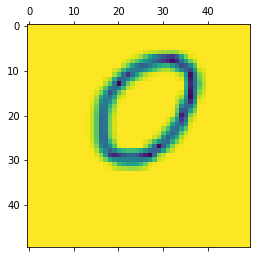

In [471]:
plt.matshow(X_train[50])

In [472]:
y_train[50]

0

In [473]:
X_train.shape

(28800, 50, 50, 1)

In [474]:
X_train_flat =X_train.reshape(len(X_train),50*50)
X_test_flat =X_test.reshape(len(X_test),50*50)

In [475]:
X_test_flat.shape

(7200, 2500)

In [476]:
X_train_flat.shape

(28800, 2500)

In [477]:

                        
theModel = keras.Sequential([
    keras.layers.Dense(3, input_shape=(2500,),activation='sigmoid')
])

theModel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

theModel.fit(X_train_flat, y_train, epochs=20)

Epoch 1/20
900/900 [==============================] - 3s 3ms/step - loss: 1.0704 - accuracy: 0.4736
Epoch 2/20
900/900 [==============================] - 3s 3ms/step - loss: 0.7232 - accuracy: 0.6875
Epoch 3/20
900/900 [==============================] - 3s 3ms/step - loss: 0.5897 - accuracy: 0.7725
Epoch 4/20
900/900 [==============================] - 3s 3ms/step - loss: 0.5116 - accuracy: 0.8129
Epoch 5/20
900/900 [==============================] - 3s 3ms/step - loss: 0.4533 - accuracy: 0.8445
Epoch 6/20
900/900 [==============================] - 3s 3ms/step - loss: 0.4097 - accuracy: 0.8599
Epoch 7/20
900/900 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8789
Epoch 8/20
900/900 [==============================] - 3s 3ms/step - loss: 0.3213 - accuracy: 0.9085
Epoch 9/20
900/900 [==============================] - 3s 3ms/step - loss: 0.3027 - accuracy: 0.9147
Epoch 10/20
900/900 [==============================] - 3s 4ms/step - loss: 0.2730 - accuracy: 0.9272

In [478]:
theModel.evaluate(X_test_flat, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 1.0000


[0.09058699011802673, 1.0]

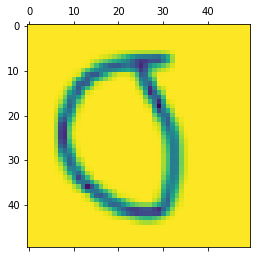

In [479]:
plt.matshow(X_test[0])

In [480]:
prediction = theModel.predict(X_test_flat)
prediction[0]

array([0.7986615 , 0.36888048, 0.16829693], dtype=float32)

In [481]:
np.argmax(prediction[0])

0

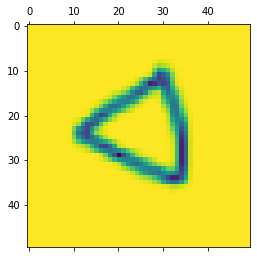

In [482]:
plt.matshow(X_test[1])

In [483]:
prediction = theModel.predict(X_test_flat)
prediction[1]

array([0.1774934 , 0.05085588, 0.9869413 ], dtype=float32)

In [484]:
np.argmax(prediction[1])

2

In [485]:
predictionLabels = [np.argmax(i) for i in prediction]
predictionLabels[:3]

[0, 2, 1]

In [486]:
y_test[:3]

array([0, 2, 1])

In [487]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictionLabels)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[2400,    0,    0],
       [   0, 2400,    0],
       [   0,    0, 2400]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

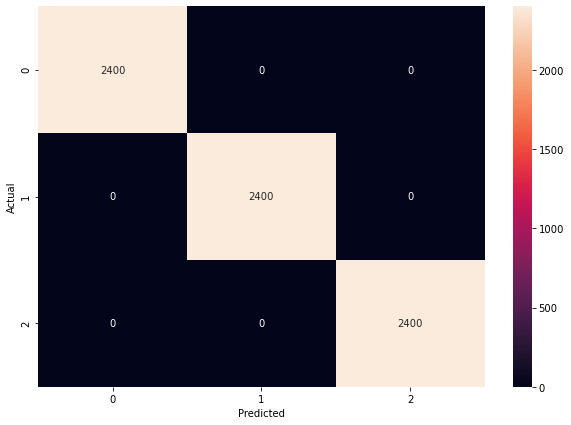

In [488]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')